In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

38816


In [2]:
plt.style.use('dark_background')

# Load cell-type specific dicts

In [14]:
rep1_class_2_zxys_file = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220316-P_brain_CTP11-12-13_from_0304\Decoder\class_2_chr_zxys_n18091.pkl'

In [15]:
rep2_class_2_zxys_file = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220402-P_brain_CTP11-13_from_0329_warp\Decoder\v1\class_2_chr_zxys_n16925.pkl'

In [16]:
rep1_class_2_zxys = pickle.load(open(rep1_class_2_zxys_file, 'rb'))

rep2_class_2_zxys = pickle.load(open(rep2_class_2_zxys_file, 'rb'))

In [187]:
from scipy.spatial.distance import pdist, squareform

In [188]:
zxys_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_chr_zxys_n35016.pkl',
                    allow_pickle=True)

In [198]:
zxys_dict['GABA'][0][str(sel_chr)].shape

(2, 153, 3)

In [208]:
distmap_dict = {}


In [419]:
from tqdm import tqdm
sel_chr = 7

In [466]:
from ImageAnalysis3.structure_tools.distance import Chr2ZxysList_2_summaryDist_by_key

In [489]:
from scipy.spatial.distance import cdist
def Chr2ZxysList_2_Dist_by_key(chr_2_zxys_list, _c1, _c2, codebook_df,
                                 function='nanmedian', axis=0, 
                                 verbose=False):
    _out_dist_dict = {}
    if _c1 != _c2:
        _out_dist_dict[(_c1,_c2)] = []
    else:
        _out_dist_dict[f"cis_{_c1}"] = []
        _out_dist_dict[f"trans_{_c1}"] = []
    for _chr_2_zxys in chr_2_zxys_list:
        # skip if not all info exists
        if _c1 not in _chr_2_zxys or _c2 not in _chr_2_zxys or _chr_2_zxys[_c1] is None or _chr_2_zxys[_c2] is None:
            continue
        else:
            # if not from the same chr label, calcluate trans-chr with cdist
            if _c1 != _c2:
                for _zxys1 in _chr_2_zxys[_c1]:
                    for _zxys2 in _chr_2_zxys[_c2]:
                        _out_dist_dict[(_c1,_c2)].append(cdist(_zxys1, _zxys2))
            # if from the same chr label, calculate both cis and trans
            else:
                # cis
                _out_dist_dict[f"cis_{_c1}"].extend([squareform(pdist(_zxys)) for _zxys in _chr_2_zxys[_c1]])
                # trans
                if len(_chr_2_zxys[_c1]) > 1:
                    # loop through permutations
                    for _i1, _i2 in permutations(np.arange(len(_chr_2_zxys[_c1])), 2):
                        _out_dist_dict[f"trans_{_c1}"].append(
                            cdist(_chr_2_zxys[_c1][_i1], _chr_2_zxys[_c1][_i2])
                        )
    for _key in _out_dist_dict:
        print(_key, len(_out_dist_dict[_key]))
    return {_k:np.array(_v) for _k,_v in _out_dist_dict.items()}

In [574]:
c1 = '1'
c2 = '7'
for _type in distmap_dict:
    _out_dict = Chr2ZxysList_2_Dist_by_key(zxys_dict[_type], c1, c2, codebook)
    distmap_dict[_type].update(_out_dict)

('1', '7') 9389
('1', '7') 12972
('1', '7') 40150
('1', '7') 7794


In [420]:
for _k, _dicts in zxys_dict.items():
    if _k not in distmap_dict:
        distmap_dict[_k] = {}
    
    sel_distmaps = []
    for _chr_2_zxys in _dicts:
        if str(sel_chr) not in _chr_2_zxys:
            continue
        _zxys = _chr_2_zxys[str(sel_chr)]
        sel_distmaps += [squareform(pdist(_zxy)) for _zxy in _zxys]
    # append
    distmap_dict[_k][f'cis_{sel_chr}'] = np.array(sel_distmaps)


chr1
73,50 # real
76,50 # not real
87,50
84,50
84,73
87,73
114

chr2
106,127,
19,127,
16,127, # weaker in astro and oligo
138,127
16,106
19,106

chr 3
32 116 113
5 116, 113

chr4 
113 49 no
49,82 no

chr5
0,69 no
chr6
88,30

chr11
37,97

chr7
39,66 

In [523]:
with h5py.File(r'\\10.245.74.212\Chromatin_NAS_3\HiC_cortex\hic_map_cortex_20kb\AB_comp_40k.hdf5', 'r') as _f:
    print(_f['chr1'].keys())
    pc1 = _f['chr1']['pc1_vector'][:]

<KeysViewHDF5 ['corr_map', 'pc1_vector', 'reg_starts']>


In [ ]:
AB_dict = 

In [291]:
import pandas as pd
codebook = pd.read_csv(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\merged_codebook_w_celltype.csv')
bit_columns = [_n for _n in codebook.columns if 'NDB' in _n]

In [527]:
compartment_codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220316-P_brain_CTP11-12-13_from_0304\Decoder\merged_codebook_compartment.csv')

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1951   -1.0
1952   -1.0
1953   -1.0
1954   -1.0
1955   -1.0
Name: compartment, Length: 1956, dtype: float64

In [531]:
codebook['compartment'] = compartment_codebook['compartment']

In [852]:
chr_codebook = codebook.loc[codebook['chr']=='1'].sort_values('chr_order')
chr_codebook.loc[chr_codebook['chr_order']==73, ['name','cell_type','chr_order']]

name cell_type  chr_order
33  1:86240000-86260000  ['None']         73

In [855]:
chr_codebook = codebook.loc[codebook['chr']=='2'].sort_values('chr_order')
chr_codebook.loc[chr_codebook['chr_order']==127, ['name','cell_type','chr_order']]

name  cell_type  chr_order
1128  2:161757252-161819816  ['L5_IT']        127

In [857]:
chr_codebook = codebook.loc[codebook['chr']=='2'].sort_values('chr_order')
chr_codebook.loc[chr_codebook['chr_order']==16, ['name','cell_type','chr_order']]

name  cell_type  chr_order
1072  2:21251409-21298244  ['Astro']         16

<IPython.core.display.Javascript object>


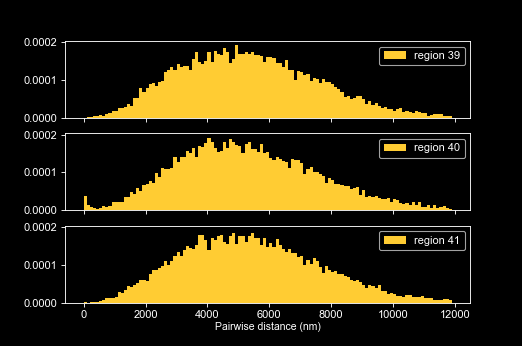

In [809]:
fig, axes = plt.subplots(3,1, figsize=(6,4), sharex=True, sharey=True)
axes[0].hist(distmap_dict['Gluta'][('1','2')][:,50,39], color=[1,0.8,0.2],
             bins=np.arange(0,12000,100), density=True, alpha=1, label='region 39')
axes[0].legend()
axes[1].hist(distmap_dict['Gluta'][('1','2')][:,50,40], color=[1,0.8,0.2], 
             bins=np.arange(0,12000,100), density=True, alpha=1, label='region 40')
axes[1].legend()
axes[2].hist(distmap_dict['Gluta'][('1','2')][:,50,41],  color=[1,0.8,0.2],
             bins=np.arange(0,12000,100), density=True, alpha=1, label='region 41')
axes[2].legend()

_ax = axes[-1]
# get ticks
_ax.set_xlabel(f"Pairwise distance (nm)", fontsize=_font_size+2, labelpad=1)
fig.savefig(os.path.join(figure_folder, f'pairwise_trans_1_2_50.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'pairwise_trans_1_2_50.png'), transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


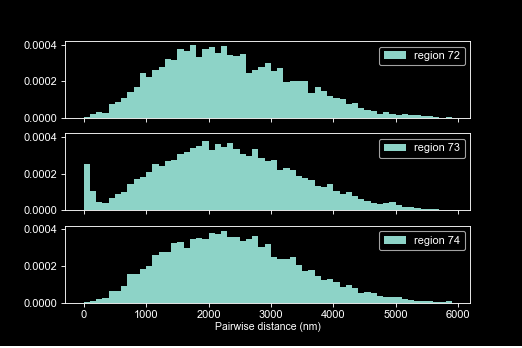

In [796]:
fig, axes = plt.subplots(3,1, figsize=(6,4), sharex=True, sharey=True)
axes[0].hist(distmap_dict['Gluta']['cis_1'][:,50,72], bins=np.arange(0,6000,100), density=True, alpha=1, label='region 72')
axes[0].legend()
axes[1].hist(distmap_dict['Gluta']['cis_1'][:,50,73], bins=np.arange(0,6000,100), density=True, alpha=1, label='region 73')
axes[1].legend()
axes[2].hist(distmap_dict['Gluta']['cis_1'][:,50,74], bins=np.arange(0,6000,100), density=True, alpha=1, label='region 74')
axes[2].legend()

_ax = axes[-1]
# get ticks
_ax.set_xlabel(f"Pairwise distance (nm)", fontsize=_font_size+2, labelpad=1)
fig.savefig(os.path.join(figure_folder, f'pairwise_chr1_50_73.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'pairwise_chr1_50_73.png'), transparent=True, dpi=300)
plt.show()

In [849]:
_cname, _reg = 2, 127

chr_codebook = codebook.loc[codebook['chr']==str(_cname)].sort_values('chr_order')
print(chr_codebook.loc[chr_codebook['chr_order']==_reg, ['name','cell_type','chr_order']])
np.where(chr_codebook.loc[chr_codebook['chr_order']==_reg, bit_columns].values)[1]

                       name  cell_type  chr_order
1128  2:161757252-161819816  ['L5_IT']        127


array([171, 178, 192], dtype=int64)

<IPython.core.display.Javascript object>


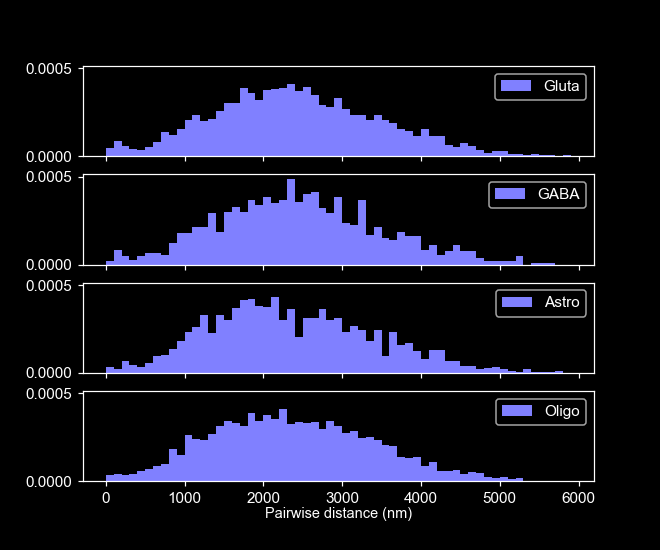

In [840]:
fig, axes = plt.subplots(4,1, figsize=(6,5), sharex=True, sharey=True,dpi=100)

for _i, _ax in enumerate(axes):
    _key = keys[_i]
    _ax.hist(distmap_dict[_key]['cis_2'][:,16,127], bins=np.arange(0,6000,100), density=True, 
             alpha=1, label=f'{_key}', color=[0.5,0.5,1])
    _ax.legend()
# get ticks
_ax.set_xlabel(f"Pairwise distance (nm)", fontsize=_font_size+2, labelpad=1)
fig.savefig(os.path.join(figure_folder, f'pairwise_chr2_16_127.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'pairwise_chr2_16_127.png'), transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


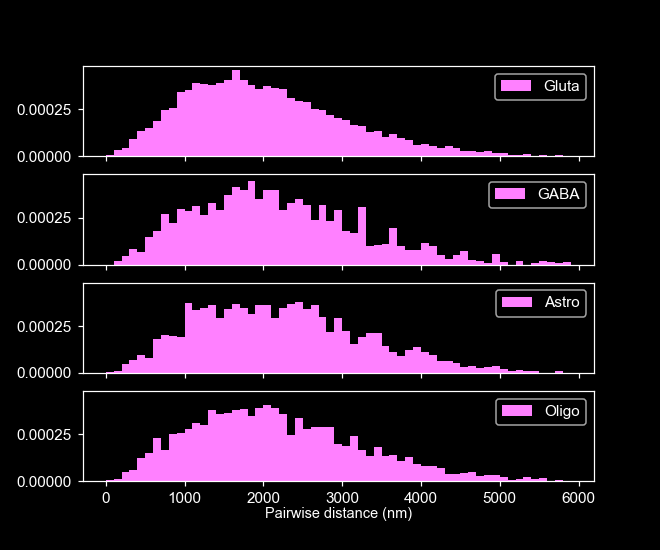

In [765]:
fig, axes = plt.subplots(4,1, figsize=(6,5), sharex=True, sharey=True,dpi=100)

for _i, _ax in enumerate(axes):
    _key = keys[_i]
    _ax.hist(distmap_dict[_key]['cis_5'][:,0,69], bins=np.arange(0,6000,100), density=True, 
             alpha=1, label=f'{_key}', color=[1,0.5,1])
    _ax.legend()
# get ticks
_ax.set_xlabel(f"Pairwise distance (nm)", fontsize=_font_size+2, labelpad=1)
fig.savefig(os.path.join(figure_folder, f'pairwise_chr5_0_69.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'pairwise_chr5_0_69.png'), transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


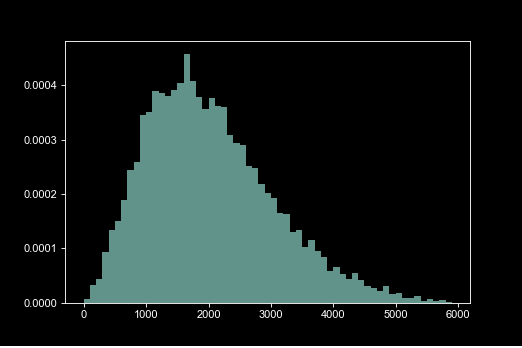

(array([6.11172228e-06, 3.30033003e-05, 4.40044004e-05, 9.41205232e-05,
        1.33235546e-04, 1.50348368e-04, 1.88241046e-04, 2.44468891e-04,
        2.59137025e-04, 3.44701137e-04, 3.50812859e-04, 3.88705537e-04,
        3.85038504e-04, 3.80149126e-04, 3.91150226e-04, 4.04596015e-04,
        4.58379171e-04, 4.08263049e-04, 3.78926782e-04, 3.56924581e-04,
        3.76482093e-04, 3.61813959e-04, 3.59369270e-04, 3.08030803e-04,
        2.94585014e-04, 2.90917981e-04, 2.50580614e-04, 2.48135925e-04,
        2.18799658e-04, 2.01686835e-04, 1.91908080e-04, 1.65016502e-04,
        1.63794157e-04, 1.30790857e-04, 1.33235546e-04, 1.02676934e-04,
        1.16122723e-04, 9.53428676e-05, 8.43417675e-05, 5.86725339e-05,
        6.60066007e-05, 5.25608116e-05, 4.27820560e-05, 5.50055006e-05,
        4.15597115e-05, 3.05586114e-05, 2.68915780e-05, 2.07798558e-05,
        3.05586114e-05, 1.58904779e-05, 1.71128224e-05, 8.55641120e-06,
        8.55641120e-06, 1.22234446e-05, 2.44468891e-06, 7.334066

In [760]:
plt.figure()
plt.hist(distmap_dict['Gluta']['cis_5'][:,0,69], bins=np.arange(0,6000,100), density=True, alpha=0.7)
#plt.hist(distmap_dict['GABA']['cis_2'][:,16,127], bins=np.arange(0,6000,100), density=True, alpha=0.7)
#plt.hist(distmap_dict['Astro']['cis_2'][:,16,127], bins=np.arange(0,6000,100), density=True, alpha=0.7)
#plt.hist(distmap_dict['Oligo']['cis_2'][:,16,127], bins=np.arange(0,6000,100), density=True, alpha=0.7)



In [201]:
_distmaps.shape

(2, 153, 153)

In [18]:
test_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_summary_dict_nonnan100',
                    allow_pickle=True)

In [135]:
from matplotlib.colors import LogNorm

In [128]:
contact_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_summary_dict_nonnan100_contact600',
                    allow_pickle=True)

In [491]:
distmap_dict['Astro'][('1', '2')].shape

(9663, 153, 143)

<IPython.core.display.Javascript object>


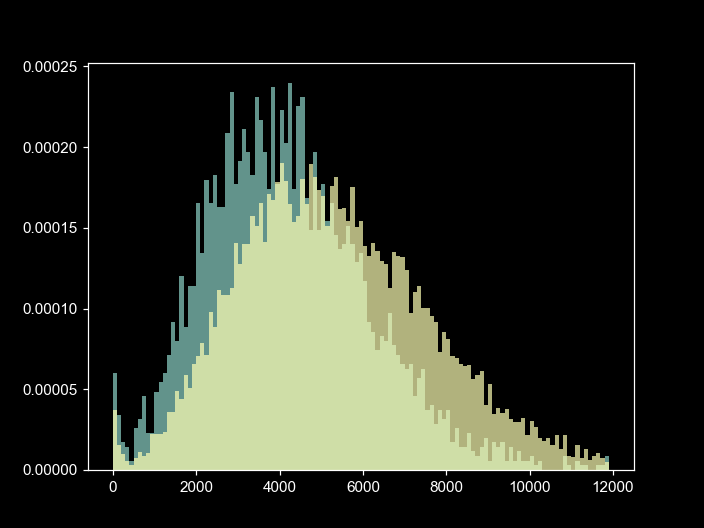

In [508]:

plt.figure()
plt.hist(distmap_dict['Astro'][('1', '2')][:,50,40], bins=np.arange(0,12000,100), density=True, alpha=0.7)
plt.hist(distmap_dict['Gluta'][('1', '2')][:,50,40], bins=np.arange(0,12000,100), density=True, alpha=0.7)
plt.show()

array([  3,   4,   6,   9,  10,  11,  12,  13,  15,  16,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        52,  53,  56,  57,  65,  70,  75,  81,  84,  85,  86,  91,  92,
        93,  94,  96,  97,  98, 100, 101, 102, 103, 104, 105, 107, 110,
       112, 113, 114, 115, 117, 119, 120, 121, 122, 123, 124, 125, 126,
       128, 129, 131, 132, 133, 136, 138, 142, 143, 144, 145, 146, 147,
       150, 152], dtype=int64)

In [550]:
np.median(test_dict['Gluta'][('1', '2')][np.where(chr_codebook['compartment'].values==1)[0]])

5118.124703654147

In [549]:
np.median(test_dict['Gluta'][('1', '2')][np.where(chr_codebook['compartment'].values==0)[0]])

5127.652939174519

<IPython.core.display.Javascript object>


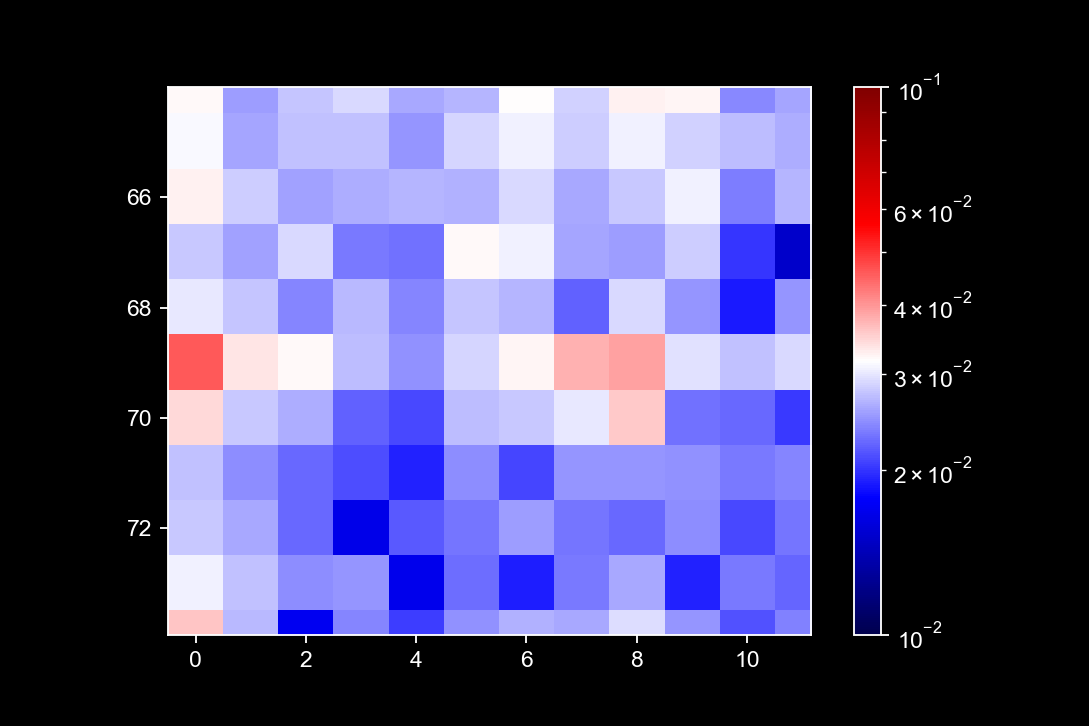

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/1278094031.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Gluta']['cis_5'],


In [763]:
plt.figure(dpi=150)
plt.imshow(contact_dict['Gluta']['cis_5'], 
           vmin=1e-2, vmax=1e-1, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


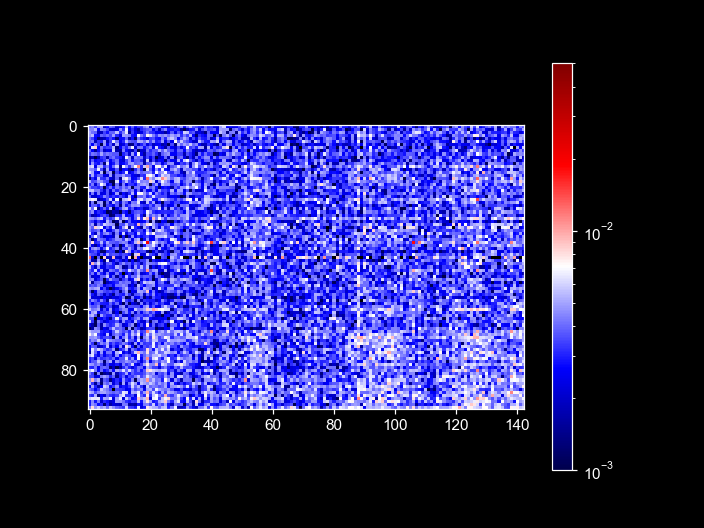

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/2077190308.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Astro'][('1', '2')][np.where(chr_codebook['compartment'].values)[0]],


In [542]:
plt.figure()
plt.imshow(contact_dict['Astro'][('1', '2')][np.where(chr_codebook['compartment'].values)[0]], 
           vmin=1e-3, vmax=5e-2, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/3073552563.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,4))


<IPython.core.display.Javascript object>


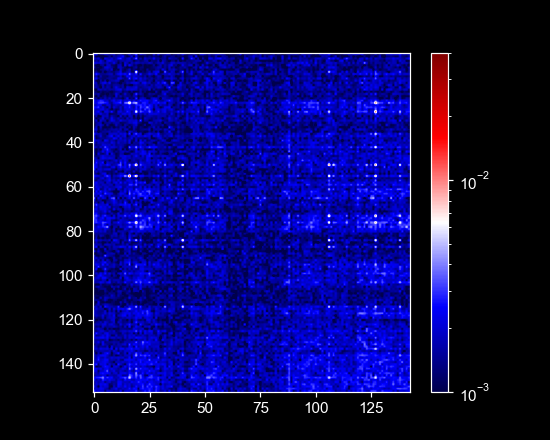

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/3073552563.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Gluta'][('1', '2')], vmin=1e-3, vmax=4e-2, cmap='seismic', norm=LogNorm())


In [591]:
plt.figure(figsize=(5,4))
plt.imshow(contact_dict['Gluta'][('1', '2')], vmin=1e-3, vmax=4e-2, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


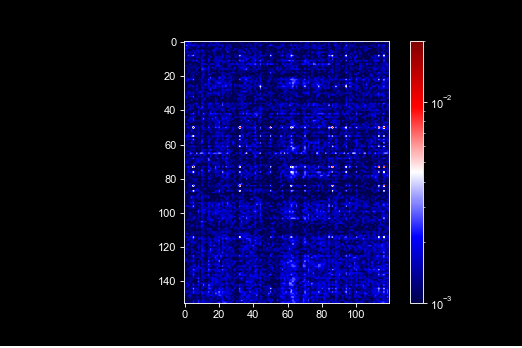

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/2985008534.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Gluta'][('1', '3')], vmin=1e-3, vmax=2e-2, cmap='seismic', norm=LogNorm())


In [770]:
plt.figure()
plt.imshow(contact_dict['Gluta'][('1', '3')], vmin=1e-3, vmax=2e-2, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


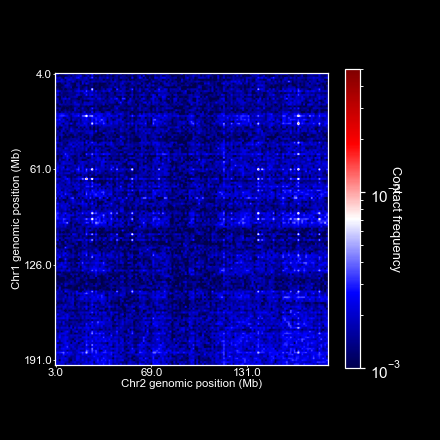

In [778]:
_key = 'Gluta'
sel_feature = ('1', '2')
vmin=1e-3
vmax=5e-2
c1, c2 = sel_feature

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])


fig, _ax = plt.subplots(figsize=(4,4), dpi=100)

_contact_mat = contact_dict[_key][sel_feature]
_pf = _ax.imshow(_contact_mat, cmap='seismic', norm=LogNorm(vmin=vmin, vmax=vmax))
# get ticks
_ax.set_yticks(c1_ticks)
_ax.set_yticklabels(c1_starts[c1_ticks])
_ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size, labelpad=1)
_ax.set_xticks(c2_ticks)
_ax.set_xticklabels(c2_starts[c2_ticks])
_ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size, labelpad=1)
_ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, ) # remove bottom ticklabels for ax1

cbar = plt.colorbar(_pf, ax=_ax, shrink=0.9)
cbar.set_label('Contact frequency', 
               fontsize=_font_size+1, labelpad=0, rotation=270)

fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_{_key}.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_{_key}.png'), transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


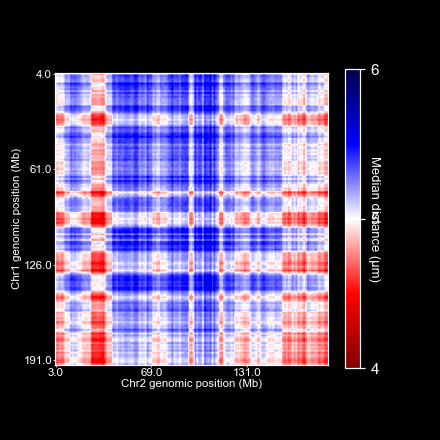

In [794]:
_key = 'Gluta'
sel_feature = ('1', '2')
vmin=4
vmax=6
c1, c2 = sel_feature

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])


fig, _ax = plt.subplots(figsize=(4,4), dpi=100)

_test_mat = test_dict[_key][sel_feature]
_pf = _ax.imshow(_test_mat/1000, cmap='seismic_r', vmin=vmin, vmax=vmax)
# get ticks
_ax.set_yticks(c1_ticks)
_ax.set_yticklabels(c1_starts[c1_ticks])
_ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size, labelpad=1)
_ax.set_xticks(c2_ticks)
_ax.set_xticklabels(c2_starts[c2_ticks])
_ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size, labelpad=1)
_ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, ) # remove bottom ticklabels for ax1

cbar = plt.colorbar(_pf, ax=_ax, shrink=0.9, ticks=np.arange(vmin,vmax+1))
cbar.set_label('Median distance (\u03BCm)', 
               fontsize=_font_size+1, labelpad=1, rotation=270)

fig.savefig(os.path.join(figure_folder, f'median_{c1}_{c2}_{_key}.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'median_{c1}_{c2}_{_key}.png'), transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


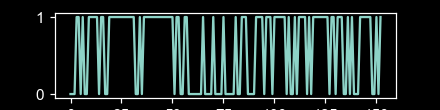

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/1087406055.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4,1))


<IPython.core.display.Javascript object>


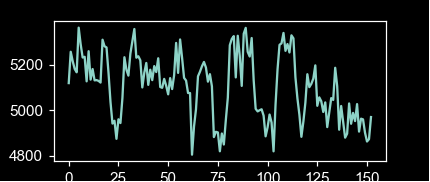

<IPython.core.display.Javascript object>


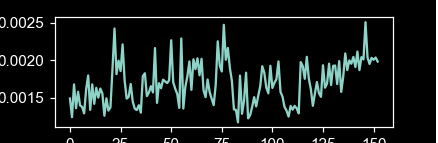

In [565]:
plt.figure(figsize=(4,1))
plt.plot(chr_codebook['compartment'].values)
plt.figure(figsize=(4,1))
plt.plot(test_dict['Gluta'][('1', '2')].mean(1))
plt.figure(figsize=(4,1))
plt.plot(contact_dict['Gluta'][('1', '2')].mean(1))



<IPython.core.display.Javascript object>


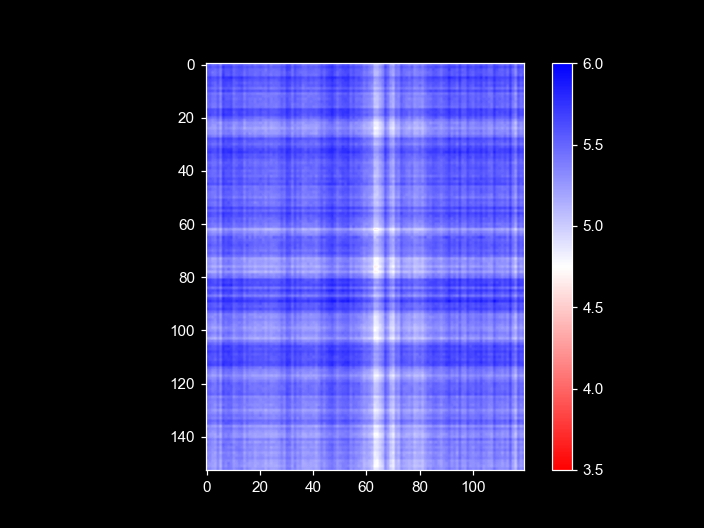

In [544]:
plt.figure()
plt.imshow(test_dict['Gluta'][('1', '3')]/1000, vmin=3.5, vmax=6, cmap='bwr_r')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


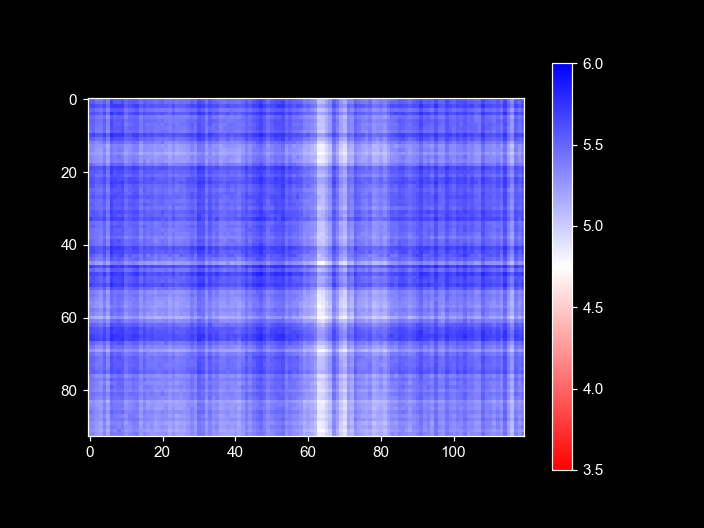

In [545]:
plt.figure()
plt.imshow(test_dict['Gluta'][('1', '3')][np.where(chr_codebook['compartment'].values)[0]]/1000, vmin=3.5, vmax=6, cmap='bwr_r')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


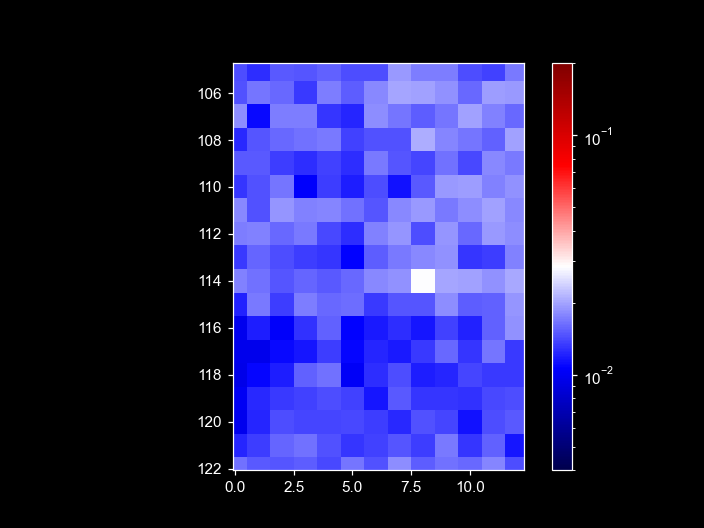

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/101979940.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Gluta'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())


In [454]:
chr_name=1

plt.figure()
plt.imshow(contact_dict['Gluta'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

In [621]:
codebook.columns

Index(['name', 'id', 'NDB_784', 'NDB_755', 'NDB_826', 'NDB_713', 'NDB_865',
       'NDB_725', 'NDB_817', 'NDB_710',
       ...
       'NDB_460', 'NDB_563', 'NDB_592', 'NDB_368', 'NDB_436', 'NDB_629',
       'NDB_604', 'cell_type', 'chr_as_num', 'compartment'],
      dtype='object', length=201)

In [695]:
plt.colorbar?

In [699]:
_ticklabel_width = 0.5
_ticklabel_size = 1
_font_size = 7.5

figure_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\pu_figures'

<IPython.core.display.Javascript object>


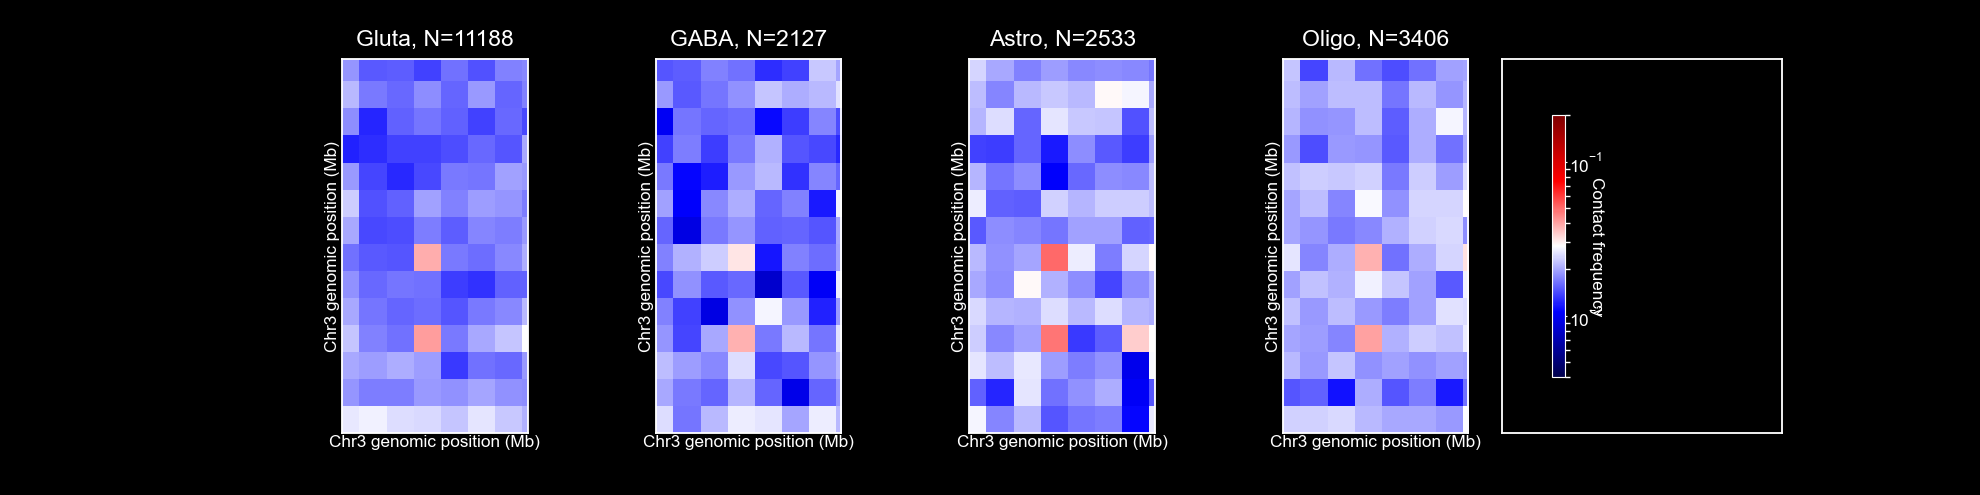

In [858]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('dark_background')

num_x = 1
num_y = 4
im_size = 3
keys = ['Gluta', 'GABA', 'Astro', 'Oligo']
sel_feature = 'cis_3'
c1 = int(sel_feature.split('_')[-1])
c2 = int(sel_feature.split('_')[-1])

vmin = 4e-3
vmax = 2e-1

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

fig, axes = plt.subplots(num_x,num_y+1, figsize=(im_size*num_y,im_size*num_x), 
                         sharex=True, sharey=True, dpi=150)

for _i, _ax in enumerate(axes[:-1]):
    _key = keys[_i]
    _contact_mat = contact_dict[_key][sel_feature]
    _pf = _ax.imshow(_contact_mat, cmap='seismic', norm=LogNorm(vmin=vmin, vmax=vmax))
    # get ticks
    _ax.set_yticks(c1_ticks)
    _ax.set_yticklabels(c1_starts[c1_ticks])
    _ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size, labelpad=1)
    _ax.set_xticks(c2_ticks)
    _ax.set_xticklabels(c2_starts[c2_ticks])
    _ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size, labelpad=1)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    # title
    _ax.set_title(f"{_key}, N={len(zxys_dict[_key])}", fontsize=_font_size+2.5)
# add color axes for the last
#divider = make_axes_locatable(axes[-1])
#cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf, ax=axes, shrink=0.7, location='right')
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Contact frequency', 
               fontsize=_font_size, labelpad=0, rotation=270)

fig.subplots_adjust(wspace=0.12, hspace=0.12,# left=0.05, right=0.95, top=0.97, bottom=0.02
                    )

fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_4types.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_4types.png'), transparent=True, dpi=300)
plt.show()

In [767]:
fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_4types_crop1.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_4types_crop1.png'), transparent=True, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


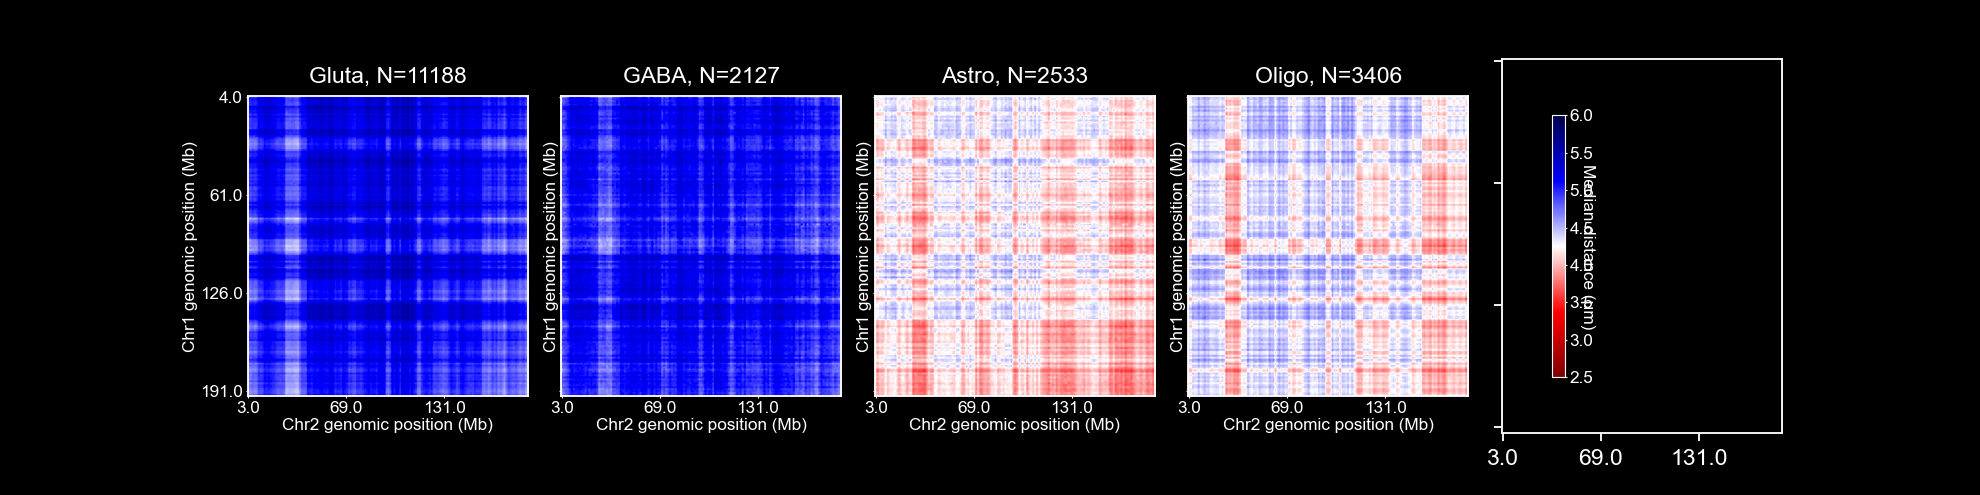

In [818]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('dark_background')

sel_feature = ('1', '2')
vmin=2.5
vmax=6
c1, c2 = sel_feature

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])


fig, axes = plt.subplots(num_x,num_y+1, figsize=(im_size*num_y,im_size*num_x), 
                         sharex=True, sharey=True, dpi=150)

for _i, _ax in enumerate(axes[:-1]):
    _key = keys[_i]

    _test_mat = test_dict[_key][sel_feature]
    _pf = _ax.imshow(_test_mat/1000, cmap='seismic_r', vmin=vmin, vmax=vmax)
    # get ticks
    _ax.set_yticks(c1_ticks)
    _ax.set_yticklabels(c1_starts[c1_ticks])
    _ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size, labelpad=1)
    _ax.set_xticks(c2_ticks)
    _ax.set_xticklabels(c2_starts[c2_ticks])
    _ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size, labelpad=1)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    # title
    _ax.set_title(f"{_key}, N={len(zxys_dict[_key])}", fontsize=_font_size+2.5)
# add color axes for the last
#divider = make_axes_locatable(axes[-1])
#cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf, ax=axes, shrink=0.7, location='right')
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (\u03BCm)', 
               fontsize=_font_size, labelpad=1, rotation=270)

fig.subplots_adjust(wspace=0.12, hspace=0.12,# left=0.05, right=0.95, top=0.97, bottom=0.02
                    )

fig.savefig(os.path.join(figure_folder, f'median_{c1}_{c2}_4class.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'median_{c1}_{c2}_4class.png'), transparent=True, dpi=300)
plt.show()

In [860]:
chr_codebook = codebook.loc[codebook['chr']=='3'].sort_values('chr_order')
chr_codebook.loc[chr_codebook['chr_order']==5, ['name','cell_type','chr_order']]

name cell_type  chr_order
151  3:13740000-13760000  ['None']          5

In [861]:
chr_codebook = codebook.loc[codebook['chr']=='3'].sort_values('chr_order')
chr_codebook.loc[chr_codebook['chr_order']==116, ['name','cell_type','chr_order']]

name cell_type  chr_order
205  3:153740000-153760000  ['None']        116

In [862]:
chr_codebook = codebook.loc[codebook['chr']=='3'].sort_values('chr_order')
chr_codebook.loc[chr_codebook['chr_order']==32, ['name','cell_type','chr_order']]

name cell_type  chr_order
165  3:48740000-48760000  ['None']         32

In [863]:
chr_codebook = codebook.loc[codebook['chr']=='3'].sort_values('chr_order')
chr_codebook.loc[chr_codebook['chr_order']==112, ['name','cell_type','chr_order']]

name  cell_type  chr_order
1193  3:146300985-146364892  ['L6_CT']        112

<IPython.core.display.Javascript object>


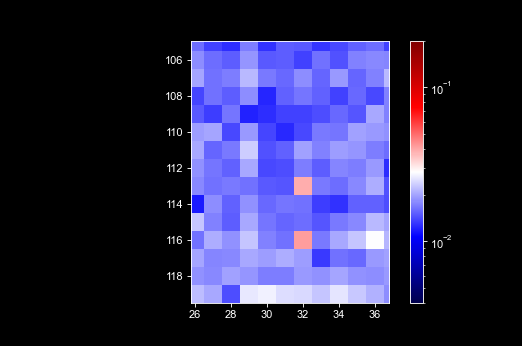

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/3663163071.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Gluta'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())


In [859]:
chr_name=3
plt.figure()
plt.imshow(contact_dict['Gluta'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


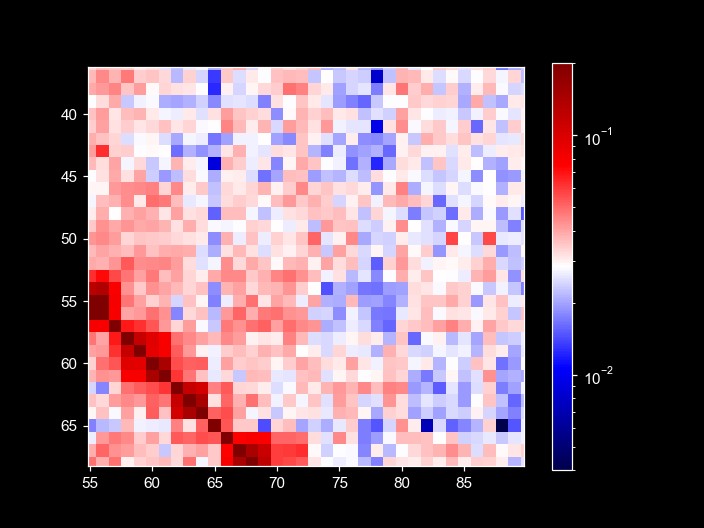

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/4164130742.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Astro'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())


In [456]:
plt.figure()
plt.imshow(contact_dict['Astro'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


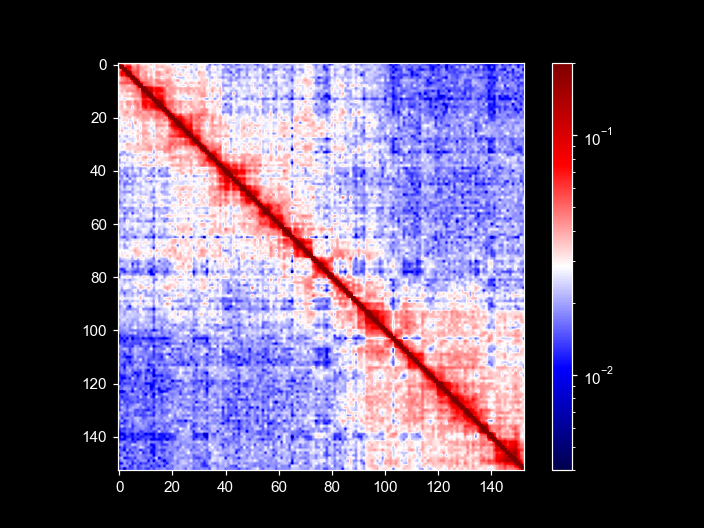

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/1132132206.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(contact_dict['Oligo'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())


In [460]:
plt.figure()
plt.imshow(contact_dict['Oligo'][f'cis_{chr_name}'], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


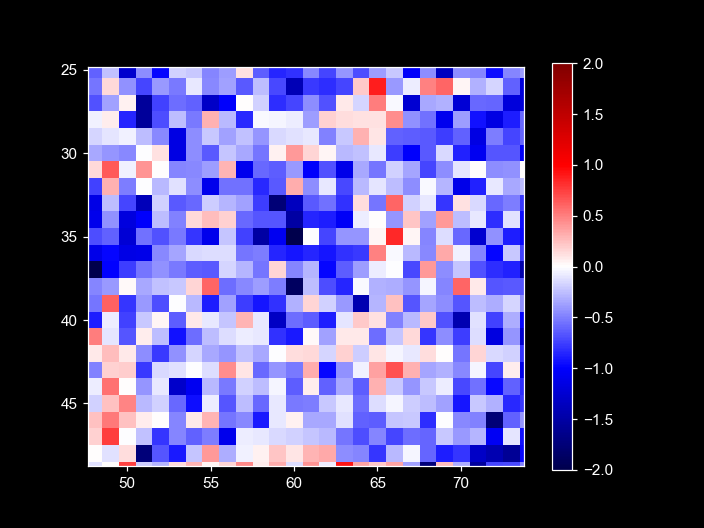

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/4014383547.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow(np.log(contact_dict['GABA'][f'cis_{chr_name}']/contact_dict['Astro'][f'cis_{chr_name}'])/np.log(2),
C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/4014383547.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(contact_dict['GABA'][f'cis_{chr_name}']/contact_dict['Astro'][f'cis_{chr_name}'])/np.log(2),


In [433]:
#chr_name = 4

plt.figure()
plt.imshow(np.log(contact_dict['GABA'][f'cis_{chr_name}']/contact_dict['Astro'][f'cis_{chr_name}'])/np.log(2), 
           vmin=-2, vmax=2, cmap='seismic')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


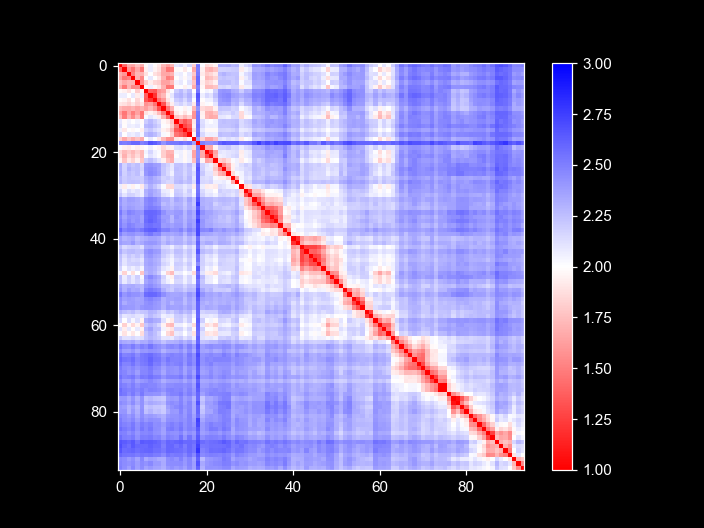

In [432]:
plt.figure()
plt.imshow(test_dict['Gluta'][f'cis_{chr_name}']/1000, vmin=1., vmax=3, cmap='bwr_r')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


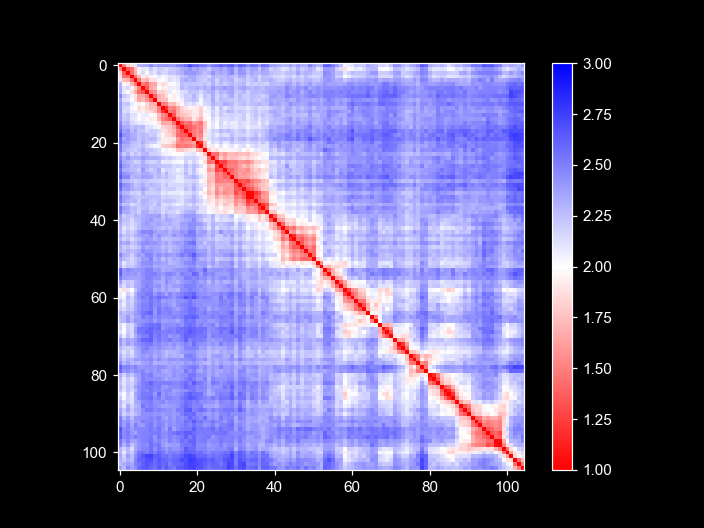

In [126]:
plt.figure()
plt.imshow(test_dict['GABA'][f'cis_{chr_name}']/1000, vmin=1., vmax=3, cmap='bwr_r')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


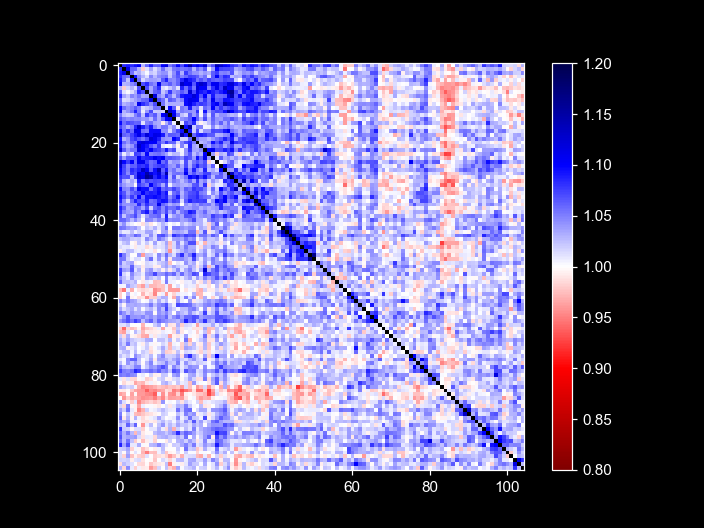

C:\Users\puzheng\AppData\Local\Temp/ipykernel_25896/2623522017.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(test_dict['GABA'][f'cis_{chr_name}']/test_dict['Gluta'][f'cis_{chr_name}'], vmin=0.8, vmax=1.2, cmap='seismic_r')


In [148]:
chr_name = 11

plt.figure()
plt.imshow(test_dict['GABA'][f'cis_{chr_name}']/test_dict['Gluta'][f'cis_{chr_name}'], vmin=0.8, vmax=1.2, cmap='seismic_r')
plt.colorbar()
plt.show()

In [4]:
rep2_summary_dict = pickle.load(open(rep2_summary_dict_file, 'rb'))

In [5]:
rep2_summary_dict.keys()

dict_keys(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri', 'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip'])

In [6]:
mat1 = rep2_summary_dict['L2/3 IT']['cis_19']

In [7]:
mat2 = rep2_summary_dict['L4/5 IT']['cis_19']

<IPython.core.display.Javascript object>


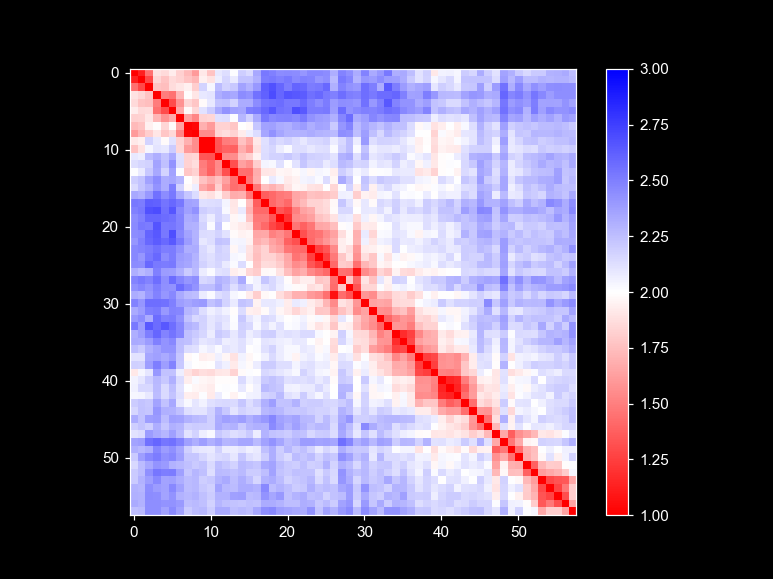

In [8]:
plt.figure()
plt.imshow(mat1/1000, vmin=1, vmax=3, cmap='bwr_r')
plt.colorbar()
plt.show()

In [9]:
from matplotlib.colors import LogNorm

<IPython.core.display.Javascript object>


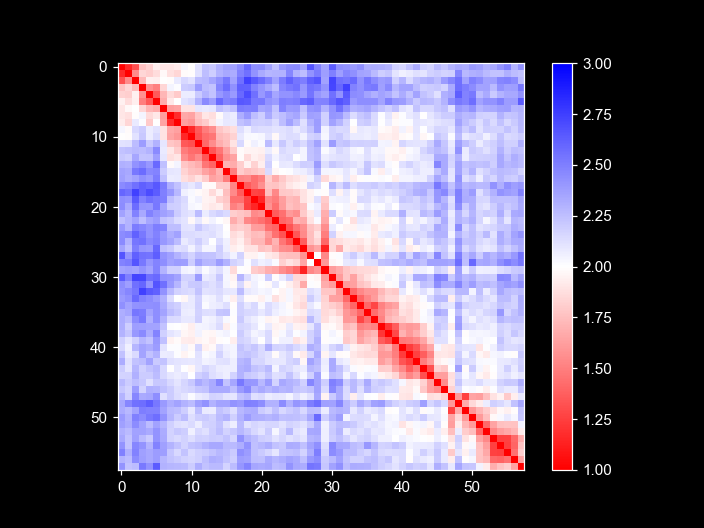

In [13]:
plt.figure()
plt.imshow(mat2/1000, vmin=1, vmax=3, cmap='bwr_r')

#plt.imshow(mat2/1000, vmin=1, vmax=3, cmap='bwr_r', norm=LogNorm(2,10))
plt.colorbar()
plt.show()